<a href="https://colab.research.google.com/github/vsan46/MA-Model/blob/main/ma_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -269.447
Date:                Fri, 12 Dec 2025   AIC                            544.895
Time:                        09:06:01   BIC                            554.790
Sample:                             0   HQIC                           548.899
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0815      0.128     -0.638      0.524      -0.332       0.169
ma.L1          0.9272      0.028     32.717      0.000       0.872       0.983
sigma2         0.8579      0.086     10.021      0.0

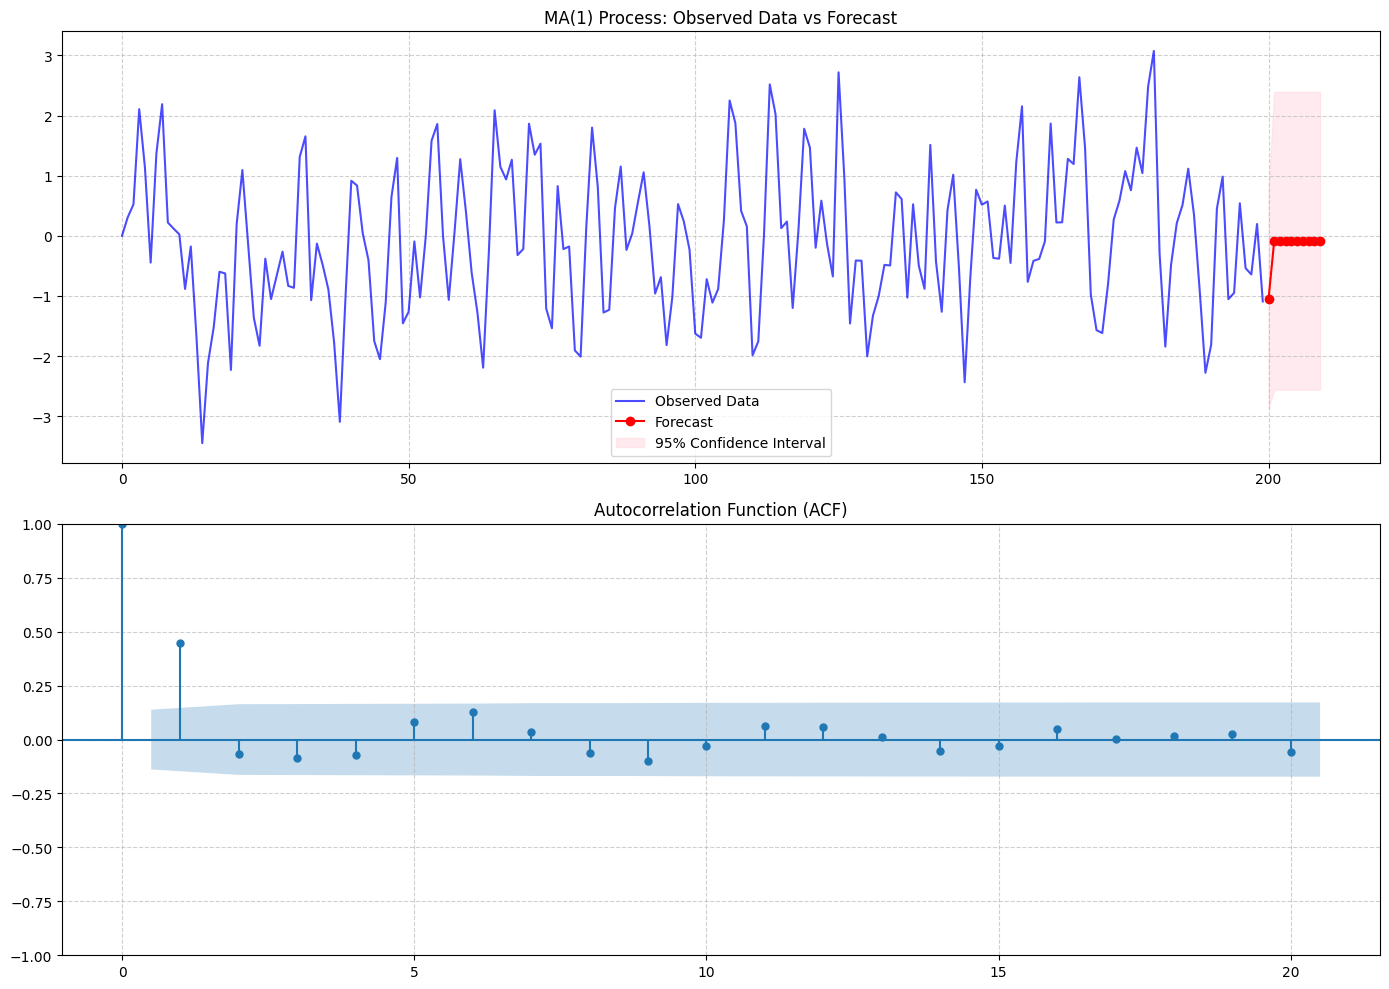

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

# ---------------------------------------------------------
# 1. Synthetic Data Generation
# ---------------------------------------------------------

# Set seed for reproducibility
np.random.seed(42)

# Define parameters for MA(1) Process
# Equation: X_t = mu + epsilon_t + theta * epsilon_{t-1}
mu = 0           # Mean
theta = 0.9      # MA parameter (coefficient for the lagged error)
n_samples = 200  # Number of data points

# Generate noise (epsilon)
errors = np.random.normal(0, 1, n_samples)

# Initialize the time series array
data = np.zeros(n_samples)

# Construct the MA(1) series manually
for t in range(1, n_samples):
    data[t] = mu + errors[t] + theta * errors[t-1]

# Convert to pandas Series for easier handling
ts_data = pd.Series(data)

# ---------------------------------------------------------
# 2. Model Fitting
# ---------------------------------------------------------

# We use ARIMA(p,d,q) where p=0 (AR), d=0 (Integrated), q=1 (MA)
# This fits an MA(1) model to our generated data
model = ARIMA(ts_data, order=(0, 0, 1))
model_fit = model.fit()

# Print the summary to check if the estimated theta matches our input (0.9)
print(model_fit.summary())

# ---------------------------------------------------------
# 3. Forecasting
# ---------------------------------------------------------

# Forecast the next 10 steps
forecast_steps = 10
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast_index = np.arange(n_samples, n_samples + forecast_steps)

# Get the confidence intervals
conf_int = forecast_result.conf_int()
lower_limits = conf_int.iloc[:, 0]
upper_limits = conf_int.iloc[:, 1]

# ---------------------------------------------------------
# 4. Visualization
# ---------------------------------------------------------

plt.figure(figsize=(14, 10))

# Subplot 1: The Raw Time Series and Forecast
plt.subplot(2, 1, 1)
plt.plot(ts_data, label='Observed Data', color='blue', alpha=0.7)
plt.plot(forecast_index, forecast_result.predicted_mean, label='Forecast', color='red', marker='o')
plt.fill_between(forecast_index, lower_limits, upper_limits, color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('MA(1) Process: Observed Data vs Forecast')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Autocorrelation Function (ACF)
# An MA(q) process should show a sharp cutoff in ACF after lag q
ax2 = plt.subplot(2, 1, 2)
plot_acf(ts_data, lags=20, ax=ax2, title='Autocorrelation Function (ACF)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()